In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [164]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [165]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Find missing values
- Fill missing Values
- Find list of items sort them by most sold item
- Find list of Outlet stores sort them by most sold item

In [166]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [167]:
print(train_data.isnull().sum())
print('======================================')
print(test_data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [168]:
train_data['Outlet_Size'].fillna('Medium',inplace = True)
test_data['Outlet_Size'].fillna('Medium',inplace = True)

train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace = True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace = True)

In [169]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Lets see what are the different types of items we have and their average sales**

In [170]:
train_data.loc[:,['Item_Type','Item_Outlet_Sales']].groupby('Item_Type').mean()

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


In [171]:
len(train_data['Item_Type'].unique())

16

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E6A4630>],
      dtype=object)

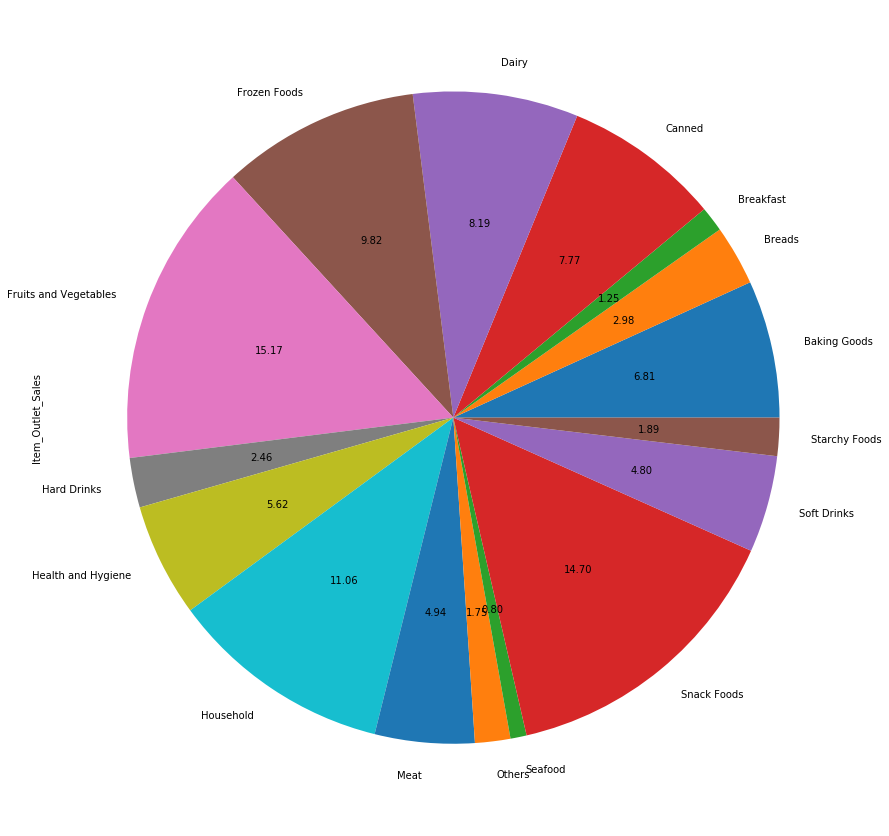

In [172]:
train_data.loc[:,['Item_Type','Item_Outlet_Sales']].groupby('Item_Type').sum().plot.pie(subplots=True,autopct='%.2f',figsize=(20,15),legend=False)

**So Fruits and vegetables,snack foods ,Household are athe most sold item types**

**Lets see how Item_mrp distrubuted**

C:\Users\WIN7\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


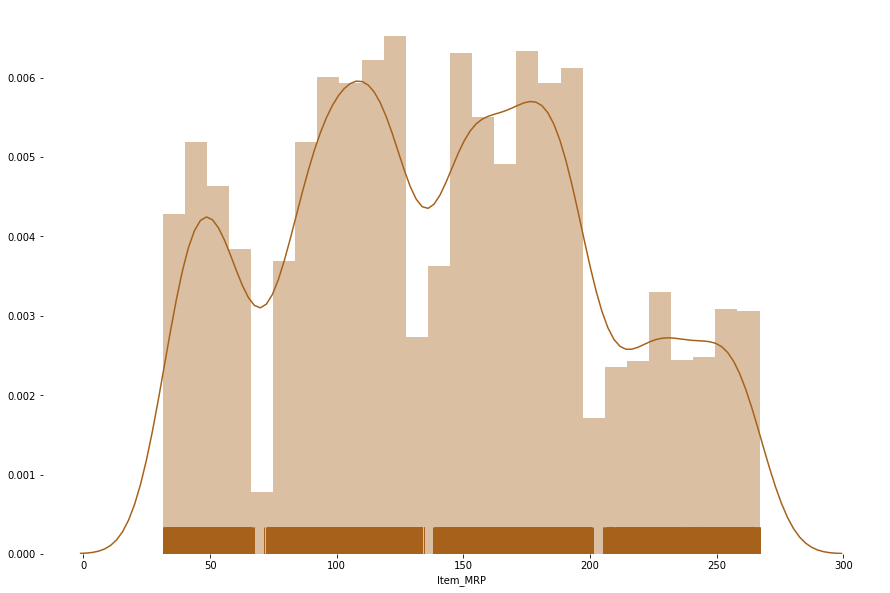

In [173]:
fig,ax= plt.subplots(figsize=(15,10))
sns.distplot(train_data.Item_MRP,rug=True,ax=ax,color='#a6611a')
sns.despine(left=True,bottom=True)

**Lets Explore the price of individual item type**

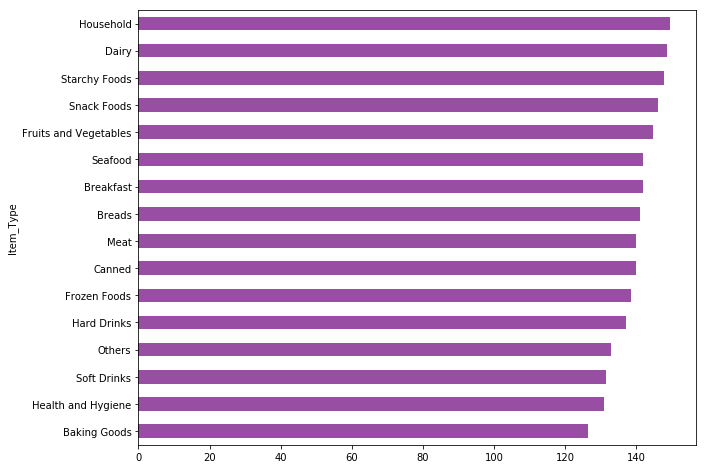

In [174]:
train_data.loc[:,['Item_Type','Item_MRP']].groupby('Item_Type').mean().sort_values('Item_MRP').plot.barh(figsize=(10,8),color='#984ea3',legend=False)

**So household products have most priced items where as baking goods least priced items and also by above plot household items are one of the most sold products**

**Lets explore what kind of fat content are our customers most interested**

In [175]:
train_data.loc[:,['Item_Fat_Content','Item_Outlet_Sales']].groupby('Item_Fat_Content').mean()

,Item_Outlet_Sales
Item_Fat_Content,
LF,2073.551928
Low Fat,2164.477336
Regular,2235.186702
low fat,2087.740737
reg,1962.192268


**Looks like we have some duplicate values so lets fix that**

In [176]:
train_data.Item_Fat_Content.replace({'LF':'LowFat','Low Fat':'LowFat','low fat':'LowFat','Regular':'Regular','reg':'Regular'},inplace=True)

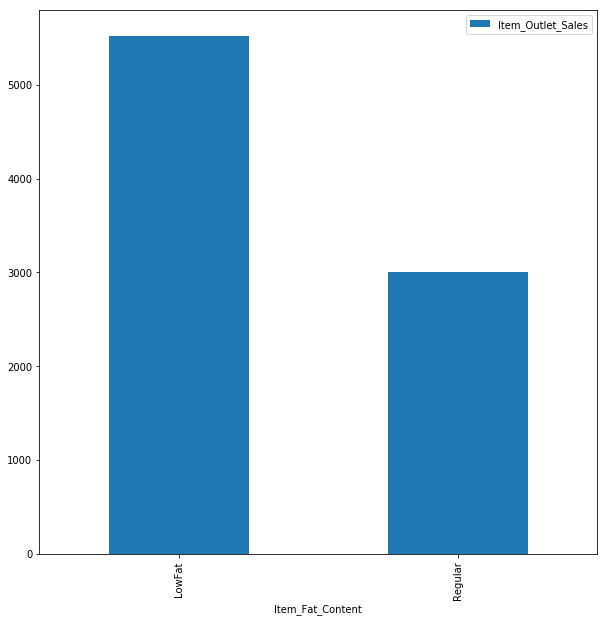

In [177]:
train_data.loc[:,['Item_Fat_Content','Item_Outlet_Sales']].groupby('Item_Fat_Content').count().plot.bar(figsize=(10,10))

**So the customers bougt more low-fat products than regular**

In [178]:
train_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

**Regression**

In [179]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [180]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [181]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [182]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [183]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [184]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [185]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [186]:
dif = pd.get_dummies(train_data['Item_Fat_Content'],prefix='Fat_Cont',drop_first=True)
dit = pd.get_dummies(train_data['Item_Type'],prefix='Item_type',drop_first=True)
dos = pd.get_dummies(train_data['Outlet_Size'],prefix='outlet_size',drop_first=True)
dolt = pd.get_dummies(train_data['Outlet_Location_Type'],prefix='outlet_loc_typ',drop_first=True)
dot = pd.get_dummies(train_data['Outlet_Type'],prefix='Outlet_Type',drop_first=True)

dift = pd.get_dummies(test_data['Item_Fat_Content'],prefix='Fat_Cont',drop_first=True)
ditt = pd.get_dummies(test_data['Item_Type'],prefix='Item_type',drop_first=True)
dost = pd.get_dummies(test_data['Outlet_Size'],prefix='outlet_size',drop_first=True)
doltt = pd.get_dummies(test_data['Outlet_Location_Type'],prefix='outlet_loc_typ',drop_first=True)
dott = pd.get_dummies(test_data['Outlet_Type'],prefix='Outlet_Type',drop_first=True)

train_data = pd.concat([train_data,dif,dit,dos,dolt,dot],axis=1)
test_data = pd.concat([test_data,dift,ditt,dost,doltt,dott],axis=1)

train_data.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)
test_data.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [187]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Fat_Cont_Regular,Item_type_Breads,Item_type_Breakfast,Item_type_Canned,Item_type_Dairy,...,Item_type_Snack Foods,Item_type_Soft Drinks,Item_type_Starchy Foods,outlet_size_Medium,outlet_size_Small,outlet_loc_typ_Tier 2,outlet_loc_typ_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [197]:
x = train_data.drop(['Item_Outlet_Sales'],axis=1)
y = train_data['Item_Outlet_Sales']

In [200]:
#Backward Elimination
def backward_elimination(x_back,y,signifance_level=0.05):
    lenx = len(x_back[0])
    temp = np.zeros(x_back.shape).astype(int)
    for i in range(0, lenx):
        rand_regressor_ols = sm.OLS(y, x_back).fit()
        maxPvalue = max(rand_regressor_ols.pvalues)
        adj_Rb = rand_regressor_ols.rsquared_adj.astype(float)
        if maxPvalue > signifance_level:
            for j in range(0, lenx - i):
                if (rand_regressor_ols.pvalues[j].astype(float) == maxPvalue):
                    temp[:,j] = x_back[:, j]
                    x_back = np.delete(x_back, j, 1)
                    tmp_regressor = sm.OLS(y, x_back).fit()
                    adj_Ra = tmp_regressor.rsquared_adj.astype(float)
                    if (adj_Rb >= adj_Ra):
                        x_rollback = np.hstack((x_back, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (rand_regressor_ols.summary())
                        return x_rollback
                    else:
                        continue
    rand_regressor_ols.summary()
    return x_back

In [204]:
x = backward_elimination(x.values,y.values)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     4748.
Date:                Mon, 14 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:42:45   Log-Likelihood:                -72001.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8514   BIC:                         1.441e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -295.3506    247.849     -1.192      0.2

In [207]:
#train-test-split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Linear Regression

In [211]:
def error_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    return np.sqrt(mse)

In [212]:
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)
y_pred = l_reg.predict(x_test)
yt_pred = l_reg.predict(x_train)

print('RMSE of train set {}'.format(error_metrics(y_train,yt_pred)))
print('RMSE of test set {}'.format(error_metrics(y_test,y_pred)))

RMSE of train set 1127.9722779248575
RMSE of test set 1132.6011931997934


## RandomForest Regression

In [ ]:
rand_reg = RandomForestRegressor()
params = {}